In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/US-pumpkins.csv")

In [3]:
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
df.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [6]:
df['Price'] = (df["Low Price"] + df["High Price"])/2

In [7]:
df.groupby('Variety')['Price'].mean()

Variety
BIG MACK TYPE               129.843581
BLUE TYPE                   226.710526
CINDERELLA                  173.819753
FAIRYTALE                   194.772273
HOWDEN TYPE                 150.938884
HOWDEN WHITE TYPE           152.081633
KNUCKLE HEAD                194.625000
MINIATURE                    27.027419
MIXED HEIRLOOM VARIETIES    161.447368
PIE TYPE                    129.666132
Name: Price, dtype: float64

In [8]:
df_reduced = df[["City Name", "Date", "Package", "Low Price", "High Price", "Variety", "Price"]]

In [9]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Variety,Price
0,BALTIMORE,4/29/17,24 inch bins,270.00,280.00,NaN,275.00
1,BALTIMORE,5/6/17,24 inch bins,270.00,280.00,NaN,275.00
2,BALTIMORE,9/24/16,24 inch bins,160.00,160.00,HOWDEN TYPE,160.00
3,BALTIMORE,9/24/16,24 inch bins,160.00,160.00,HOWDEN TYPE,160.00
4,BALTIMORE,11/5/16,24 inch bins,90.00,100.00,HOWDEN TYPE,95.00
...,...,...,...,...,...,...,...
1752,ST. LOUIS,9/30/16,22 lb cartons,14.75,14.75,MINIATURE,14.75
1753,ST. LOUIS,9/26/16,36 inch bins,275.00,275.00,MINIATURE,275.00
1754,ST. LOUIS,9/27/16,36 inch bins,275.00,275.00,MINIATURE,275.00
1755,ST. LOUIS,9/28/16,36 inch bins,275.00,275.00,MINIATURE,275.00


In [10]:
df_reduced = df_reduced[df_reduced['Package'].str.contains('bushel')] # Filter rows that fulfill the condition inside of the []

In [11]:
df_reduced

,City Name,Date,Package,Low Price,High Price,Variety,Price
70,BALTIMORE,9/24/16,1 1/9 bushel cartons,15.00,15.0,PIE TYPE,15.000
71,BALTIMORE,9/24/16,1 1/9 bushel cartons,18.00,18.0,PIE TYPE,18.000
72,BALTIMORE,10/1/16,1 1/9 bushel cartons,18.00,18.0,PIE TYPE,18.000
73,BALTIMORE,10/1/16,1 1/9 bushel cartons,17.00,17.0,PIE TYPE,17.000
74,BALTIMORE,10/8/16,1 1/9 bushel cartons,15.00,15.0,PIE TYPE,15.000
...,...,...,...,...,...,...,...
1738,ST. LOUIS,9/30/16,1/2 bushel cartons,15.00,15.0,MINIATURE,15.000
1739,ST. LOUIS,9/30/16,1/2 bushel cartons,13.75,15.0,MINIATURE,14.375
1740,ST. LOUIS,9/30/16,1/2 bushel cartons,10.75,15.0,MINIATURE,12.875
1741,ST. LOUIS,9/30/16,1/2 bushel cartons,12.00,12.0,MINIATURE,12.000


In [12]:
df_reduced['Month'] = pd.DatetimeIndex(df_reduced['Date']).month

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\3814341961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Month'] = pd.DatetimeIndex(df_reduced['Date']).month


In [13]:
df_reduced['DayOfYear'] = pd.DatetimeIndex(df_reduced['Date']).dayofyear

C:\Users\HP\AppData\Local\Temp\ipykernel_20988\1843026455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['DayOfYear'] = pd.DatetimeIndex(df_reduced['Date']).dayofyear


In [14]:
df_reduced.head()

,City Name,Date,Package,Low Price,High Price,Variety,Price,Month,DayOfYear
70,BALTIMORE,9/24/16,1 1/9 bushel cartons,15.0,15.0,PIE TYPE,15.0,9,268
71,BALTIMORE,9/24/16,1 1/9 bushel cartons,18.0,18.0,PIE TYPE,18.0,9,268
72,BALTIMORE,10/1/16,1 1/9 bushel cartons,18.0,18.0,PIE TYPE,18.0,10,275
73,BALTIMORE,10/1/16,1 1/9 bushel cartons,17.0,17.0,PIE TYPE,17.0,10,275
74,BALTIMORE,10/8/16,1 1/9 bushel cartons,15.0,15.0,PIE TYPE,15.0,10,282


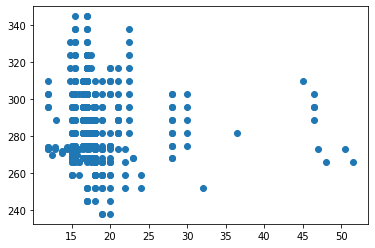

In [15]:
plt.scatter(df_reduced['Price'], df_reduced['DayOfYear'])

In [16]:
df_reduced.corr()

,Low Price,High Price,Price,Month,DayOfYear
Low Price,1.000000,0.956601,0.988231,-0.024604,-0.038501
High Price,0.956601,1.000000,0.989918,-0.043857,-0.053254
Price,0.988231,0.989918,1.000000,-0.034981,-0.046670
Month,-0.024604,-0.043857,-0.034981,1.000000,0.909124
DayOfYear,-0.038501,-0.053254,-0.046670,0.909124,1.000000


In [17]:
df_reduced = df_reduced[df_reduced['Package']=='1/2 bushel cartons']

In [18]:
# Convert City Name into numerical values
X = pd.get_dummies(df_reduced['City Name']) \
                .join(pd.get_dummies(df_reduced['Variety'])) \
                .join(df_reduced[['DayOfYear']]).values 

y = df_reduced["Price"].values

In [19]:
## FROM HERE ON, WE CAN RUN OUR PREDICTION PIPELINE!
from sklearn import model_selection, linear_model


# 2. Split in Train and Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=3)

In [20]:
# 3. Train model in the training set
# Assumption: y = a0 + a1*X[:,0]+a2*X[:,1]+...a10*X[:,9]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression())

In [21]:
pipeline.fit(X_train, y_train) #.fit method trains the model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
y_pred

array([16.69222506, 16.48812082, 16.01448297, 20.53030397, 16.56913366,
       16.50816388, 15.49028336, 17.174858  , 14.01510939, 16.39264743,
       20.53030397, 20.44229139, 18.10712575, 16.63356042, 20.47740629,
       17.0816538 , 17.0599744 , 18.55168611, 17.69584596, 16.83744686,
       17.0599744 , 17.39468766, 16.52055552, 14.50611617, 20.44229139,
       16.01448297, 17.77201119, 16.4140104 , 17.71531285, 17.60940061,
       21.05792878, 14.75323427, 16.7846122 , 20.53030397, 19.55290903,
       21.33929864, 16.56913366, 16.64504329, 18.42573344, 16.69873536,
       15.40283363, 16.64671655, 17.0178126 , 16.85635891, 20.65343145,
       13.77122072, 18.07249859])

In [24]:
y_test

array([15.   , 16.5  , 16.5  , 21.   , 15.   , 16.5  , 15.5  , 17.   ,
       12.   , 16.5  , 21.   , 20.   , 18.   , 15.   , 20.   , 17.   ,
       17.   , 18.   , 17.5  , 17.   , 17.   , 15.5  , 17.   , 15.375,
       20.   , 15.   , 18.   , 16.5  , 18.   , 19.   , 20.   , 15.   ,
       15.5  , 21.   , 24.   , 23.   , 17.   , 16.5  , 19.   , 18.   ,
       15.5  , 18.   , 15.   , 18.   , 21.   , 12.875, 18.   ])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mean_squared_error(y_test, y_pred) # Difference between corresponding predictions squared and averaged (0 is better)

1.2219179155744657

In [27]:
r2_score(y_test, y_pred) # Closer to 1 is better

0.7875641400217716

In [28]:
pipeline.score(X_test, y_test)

0.7875641400217716

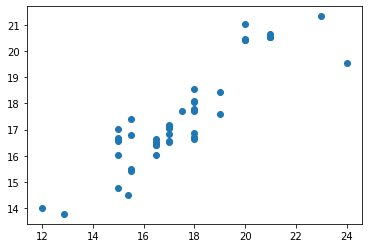

In [29]:
plt.scatter(y_test, y_pred)

In [30]:
np.max((y_pred - y_test)/y_test)

0.1679257823959368

In [31]:
np.min((y_pred - y_test)/y_test)

-0.18529545715255846

In [32]:
np.mean(np.abs(y_pred - y_test)/y_test)

0.04349401858003806